In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
dados = yf.download('JNJ',start='2020-01-01',end='2023-12-31',progress=False)
dados = dados.reset_index()
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,145.869995,146.020004,145.080002,145.970001,130.099136,5777000
1,2020-01-03,143.500000,145.369995,143.000000,144.279999,128.592834,5752400
2,2020-01-06,144.000000,144.199997,142.850006,144.100006,128.432419,7731300
3,2020-01-07,144.009995,145.449997,141.380005,144.979996,129.216766,7382900
4,2020-01-08,144.869995,145.979996,143.699997,144.960007,129.198929,6605800
...,...,...,...,...,...,...,...
1001,2023-12-22,155.250000,156.529999,155.020004,155.460007,154.288544,3798500
1002,2023-12-26,155.000000,156.350006,154.850006,156.139999,154.963409,4170000
1003,2023-12-27,155.500000,156.520004,155.419998,156.350006,155.171844,5288100
1004,2023-12-28,156.000000,157.240005,155.990005,156.580002,155.400101,4377500


In [3]:
# Vamos dividir os dados em treino ( até o final do primeiro semestre de 2023) e teste ( segundo semestre de 2023)
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

In [7]:
# Preparando os dados para o Prophet

dados_prophet_treino = dados_treino[['Date','Close']].rename(columns={'Date':'ds','Close':'y'})

In [9]:
# Criar e treinar o modelo

modelo = Prophet(weekly_seasonality=True,
                yearly_seasonality=True,
                daily_seasonality=False)
modelo.add_country_holidays(country_name='US')

modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpohok5fav/rediud_8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpohok5fav/x6ki0ikh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25683', 'data', 'file=/tmp/tmpohok5fav/rediud_8.json', 'init=/tmp/tmpohok5fav/x6ki0ikh.json', 'output', 'file=/tmp/tmpohok5fav/prophet_model97b1w7jw/prophet_model-20240330012850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:28:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:28:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [10]:
# Criar datas futuras para previsão até final de 2023

futuro = modelo.make_future_dataframe(periods=150)

previsao = modelo.predict(futuro)

In [11]:
previsao

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,146.122755,145.170998,155.900129,146.122755,146.122755,0.0,0.0,0.0,0.0,...,0.254476,0.254476,0.254476,4.129962,4.129962,4.129962,0.0,0.0,0.0,150.507194
1,2020-01-03,146.098731,144.901468,155.949543,146.098731,146.098731,0.0,0.0,0.0,0.0,...,0.393547,0.393547,0.393547,3.930311,3.930311,3.930311,0.0,0.0,0.0,150.422588
2,2020-01-06,146.026658,144.243325,154.168744,146.026658,146.026658,0.0,0.0,0.0,0.0,...,-0.010894,-0.010894,-0.010894,3.290189,3.290189,3.290189,0.0,0.0,0.0,149.305952
3,2020-01-07,146.002633,143.718926,154.539289,146.002633,146.002633,0.0,0.0,0.0,0.0,...,0.158517,0.158517,0.158517,3.077639,3.077639,3.077639,0.0,0.0,0.0,149.238789
4,2020-01-08,145.978609,143.725771,154.563517,145.978609,145.978609,0.0,0.0,0.0,0.0,...,0.303936,0.303936,0.303936,2.872514,2.872514,2.872514,0.0,0.0,0.0,149.155059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,2023-12-21,149.716419,142.679128,165.526029,139.080091,158.891231,0.0,0.0,0.0,0.0,...,0.254476,0.254476,0.254476,4.602463,4.602463,4.602463,0.0,0.0,0.0,154.573358
1045,2023-12-22,149.663754,143.317688,165.569898,138.907061,159.031958,0.0,0.0,0.0,0.0,...,0.393547,0.393547,0.393547,4.732636,4.732636,4.732636,0.0,0.0,0.0,154.789936
1046,2023-12-23,149.611089,141.551071,164.886059,138.750905,159.077796,0.0,0.0,0.0,0.0,...,-0.549791,-0.549791,-0.549791,4.832364,4.832364,4.832364,0.0,0.0,0.0,153.893662
1047,2023-12-24,149.558424,141.886982,164.289982,138.573011,159.190323,0.0,0.0,0.0,0.0,...,-0.549791,-0.549791,-0.549791,4.900118,4.900118,4.900118,0.0,0.0,0.0,153.908751


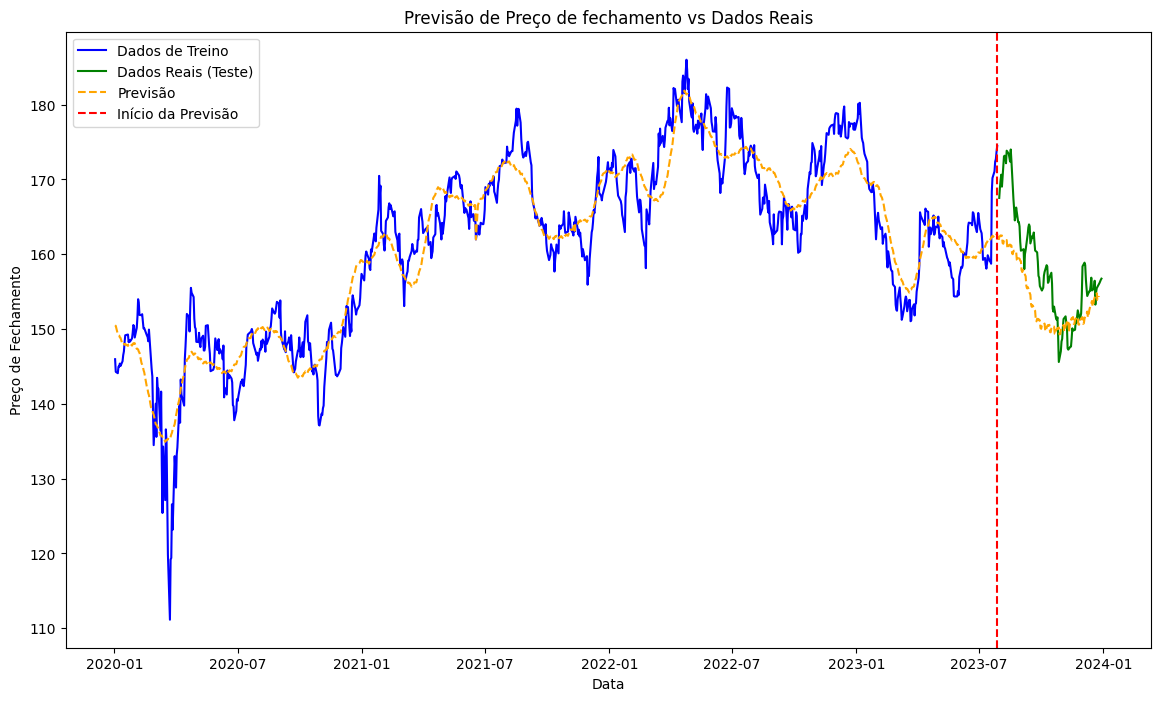

In [15]:
plt.figure(figsize=(14,8))
plt.plot(dados_treino['Date'],dados_treino['Close'],label='Dados de Treino',color = 'blue')
plt.plot(dados_teste['Date'],dados_teste['Close'],label='Dados Reais (Teste)',color = 'green')
plt.plot(previsao['ds'],previsao['yhat'],label='Previsão',color = 'orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--',label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de fechamento vs Dados Reais')
plt.legend()
plt.show()